In [1]:
import pandas as pd
import numpy as np

# Creating a sample dataset for data cleaning practice
data = {
    'Name': ['John', 'Emily', 'Michael', 'Sarah', 'David', 'Michael', 'Anna', np.nan, 'Emily', 'David'],
    'Age': [29, 22, 35, np.nan, 45, 35, 23, 41, np.nan, 45],
    'Salary': [50000, 54000, 62000, 58000, np.nan, 62000, 49000, 60000, 54000, np.nan],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', np.nan, 'Chicago', 'New York', 'Houston', 'Los Angeles', 'Houston'],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'M', 'F', np.nan, 'F', 'M']
}

# Adding some outliers to the Salary column
data['Salary'][2] = 150000  # Michael's salary is an outlier
data['Salary'][4] = 180000  # David's salary is also an outlier

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving to CSV
df.to_csv('data_cleaning_practice.csv', index=False)


# Handling Missing Data

## Remove missing data

In [2]:
df1 = pd.read_csv('data_cleaning_practice.csv')
df1

,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,M
1,Emily,22.0,54000.0,Los Angeles,F
2,Michael,35.0,150000.0,Chicago,M
3,Sarah,NaN,58000.0,Houston,F
4,David,45.0,180000.0,NaN,M
5,Michael,35.0,62000.0,Chicago,M
6,Anna,23.0,49000.0,New York,F
7,NaN,41.0,60000.0,Houston,NaN
8,Emily,NaN,54000.0,Los Angeles,F
9,David,45.0,NaN,Houston,M


In [3]:
df1.dropna()

,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,M
1,Emily,22.0,54000.0,Los Angeles,F
2,Michael,35.0,150000.0,Chicago,M
5,Michael,35.0,62000.0,Chicago,M
6,Anna,23.0,49000.0,New York,F


## Impute missing data

In [4]:
mode = df1['Age'].mode()
df1['Age'].fillna(mode[0],inplace=True)

In [5]:
df1

,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,M
1,Emily,22.0,54000.0,Los Angeles,F
2,Michael,35.0,150000.0,Chicago,M
3,Sarah,35.0,58000.0,Houston,F
4,David,45.0,180000.0,NaN,M
5,Michael,35.0,62000.0,Chicago,M
6,Anna,23.0,49000.0,New York,F
7,NaN,41.0,60000.0,Houston,NaN
8,Emily,35.0,54000.0,Los Angeles,F
9,David,45.0,NaN,Houston,M


In [6]:
med = df1['Salary'].median()
df1['Salary'].fillna(med,inplace=True)

In [7]:
df1

,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,M
1,Emily,22.0,54000.0,Los Angeles,F
2,Michael,35.0,150000.0,Chicago,M
3,Sarah,35.0,58000.0,Houston,F
4,David,45.0,180000.0,NaN,M
5,Michael,35.0,62000.0,Chicago,M
6,Anna,23.0,49000.0,New York,F
7,NaN,41.0,60000.0,Houston,NaN
8,Emily,35.0,54000.0,Los Angeles,F
9,David,45.0,58000.0,Houston,M


In [8]:
df1.ffill()

,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,M
1,Emily,22.0,54000.0,Los Angeles,F
2,Michael,35.0,150000.0,Chicago,M
3,Sarah,35.0,58000.0,Houston,F
4,David,45.0,180000.0,Houston,M
5,Michael,35.0,62000.0,Chicago,M
6,Anna,23.0,49000.0,New York,F
7,Anna,41.0,60000.0,Houston,F
8,Emily,35.0,54000.0,Los Angeles,F
9,David,45.0,58000.0,Houston,M


## Handling Duplicates

In [9]:
df1.drop_duplicates()

,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,M
1,Emily,22.0,54000.0,Los Angeles,F
2,Michael,35.0,150000.0,Chicago,M
3,Sarah,35.0,58000.0,Houston,F
4,David,45.0,180000.0,NaN,M
5,Michael,35.0,62000.0,Chicago,M
6,Anna,23.0,49000.0,New York,F
7,NaN,41.0,60000.0,Houston,NaN
8,Emily,35.0,54000.0,Los Angeles,F
9,David,45.0,58000.0,Houston,M


## Detect and remove duplicate rows that could skew your analysis

There is no duplicate in Given Data
1st drop duplicates If duplicates available that effect the DataFrame 
Check If it is Benificial Just Inplace it True

# Data Transformation

## Normalize or scale your data (especially for machine learning models).

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
NormalizedData= scalar.fit_transform(df1[['Salary']])
nor_df = pd.DataFrame(NormalizedData)
print('Raw Data')
print(df1)
print('Normalized Data')
print(nor_df)

Raw Data
      Name   Age    Salary         City Gender
0     John  29.0   50000.0     New York      M
1    Emily  22.0   54000.0  Los Angeles      F
2  Michael  35.0  150000.0      Chicago      M
3    Sarah  35.0   58000.0      Houston      F
4    David  45.0  180000.0          NaN      M
5  Michael  35.0   62000.0      Chicago      M
6     Anna  23.0   49000.0     New York      F
7      NaN  41.0   60000.0      Houston    NaN
8    Emily  35.0   54000.0  Los Angeles      F
9    David  45.0   58000.0      Houston      M
Normalized Data
          0
0  0.007634
1  0.038168
2  0.770992
3  0.068702
4  1.000000
5  0.099237
6  0.000000
7  0.083969
8  0.038168
9  0.068702


This Help Us to Covert Value b/w 0-1 I help to Built Ml Model more efficient and help us to find Outliers 

## Transform data types to ensure consistency

In Our Given Data There is no need to change data type Otherwise we used 
df['Column we want to change Data Type']= df['same column'].astype(int)

## Identify and treat outliers which could distort the analysis.


outliers are the values which is outside of box Just like in given Exemple below 101 is a outlier with the outlier values will be changed and results will be not clearify
we can find outliers with the help of
- Boxplots
- Z-score
- Inter Quantile Range(IQR)

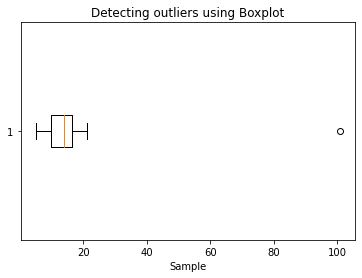

In [11]:
import matplotlib.pyplot as plt

sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

Best way to Deal with outlier is to remove in upr case

# Handling Categorical Data

## Convert a categorical column into numeric using label encoding


As we can see Male and Female are 2 Catagories in Gender Column so we convert into numericl so Ml model can predict it very easily 
_ o As Female
_ 1 as Male

In [12]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df1['Gender']= label_encoder.fit_transform(df['Gender'])

df1


,Name,Age,Salary,City,Gender
0,John,29.0,50000.0,New York,1
1,Emily,22.0,54000.0,Los Angeles,0
2,Michael,35.0,150000.0,Chicago,1
3,Sarah,35.0,58000.0,Houston,0
4,David,45.0,180000.0,NaN,1
5,Michael,35.0,62000.0,Chicago,1
6,Anna,23.0,49000.0,New York,0
7,NaN,41.0,60000.0,Houston,2
8,Emily,35.0,54000.0,Los Angeles,0
9,David,45.0,58000.0,Houston,1
